## CCNSS 2018 Module 1: Neurons, synapses and networks
# Tutorial 4: Balanced neuronal excitation and inhibition
[source](https://colab.research.google.com/drive/1I4b01XubbttyGW1nahCEBM-Yl0K98QrV)

Please execute the cell below to initialise the notebook environment.

In [1]:
%autosave 0

import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import random                      # import basic random number generator functions

fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

Autosave disabled



## Objectives

In this tutorial, we will build on the conductance-based model in Tutorial 4 to study E/I balance and fluctuation-drive spiking in a conductance based neuron.

**Background paper:**

* Song S, Miller K and Abott L (2000) Competitive Hebbian learning through spike-timing-dependent synaptic plasticity. Nature Neurosci 3.

**Extra reading:**

* Softy W and Koch C (1993) The highly irregular firing of cortical cells is inconsistent with temporal integration of random EPSPs. J Neurosci 13.

* Okun M and Lampl I (2009) Balance of excitation and inhibition. Scholarpedia: http://www.scholarpedia.org/article/Balance_of_excitation_and_inhibition

## Background


In [2]:
t_max = 500e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # volt
e_ex = 0         # volt
e_in = -70e-3    # volt
vr = -70e-3      # volt
vth = -50e-3     # volt
tau_syn = 5e-3   # second 

**Exercise 1:** Fill in in the following functions to generate Poisson spikes and simulate a postsynaptic neuron with both excitatory and inhibitoy conductances (no plasticity). Use the code you wrote in Tutorial 3 and build it up to incorporate inhibition, by adding an inhibitory conductance:


\begin{align}
&\tau_m\,\frac{dV}{dt}\ = E_{L} - V(t) + g_{ex}(t)(E_{ex}-V(t))+ g_{in}(t)(E_{in}-V(t)) &\text{if }\quad V(t) \leq V_{th}\\
&V(t) = V_{r} &\text{otherwise}\\
\end{align}

Also modify the code to return the spike times of the postsynpatic neuron. Then, simulate a postsynaptic neuron with 800 excitatory inputs and 200 inhibitory inputs at 10 Hz for 500 ms, with peak conductances of $\bar g_{max,ex} = \bar g_{max,in} = 6*10^{-3}$.


In [3]:
random.seed(0)

def generate_Poisson_spikes(t,rate,n):
  """ Generates poisson spike trains
  
  Arguments:
  t -- time
  rate -- firing rate (Hz)
  n -- number of spike trains
  
  Returns:
  pre_spike_train -- spike train matrix, ith row represents whether 
                     there is a spike in ith spike train over time
                     (1 if spike, 0 otherwise)
  """
  # insert your code here
  return pre_spike_train

def simulate_postsynaptic_neuron(t,pre_spike_train_ex,pre_spike_train_in):
    """ Simulate nonplastic postsynaptic neuron
  
    Arguments:
    t -- time
    pre_spike_train_ex -- excitatory presynaptic spike train matrix, same length as t
    pre_spike_train_in -- inhibitory presynaptic spike train matrix, same length as t
  
    Returns:
    v -- membrane potential
    spike_times -- list of postsynaptic spike times
    """
    # insert your code here
    return v,spike_times

# insert your code here

In [4]:
random.seed(0)

def generate_Poisson_spikes(t,rate,n):
  """ Generates poisson spike trains
  
  Arguments:
  t -- time
  rate -- firing rate (Hz)
  n -- number of spike trains
  
  Returns:
  pre_spike_train -- spike train matrix, ith row represents whether 
                     there is a spike in ith spike train over time
                     (1 if spike, 0 otherwise)
  """
  pre_spike_train = np.zeros((n,len(t)), dtype=np.int)
  for k in range(n):
    for j in range(len(t)):
      if random.random() < rate * dt:
        pre_spike_train[k,j] = 1
  return pre_spike_train

def simulate_postsynaptic_neuron(t,pre_spike_train_ex,pre_spike_train_in):
    """ Simulate nonplastic postsynaptic neuron
  
    Arguments:
    t -- time
    pre_spike_train_ex -- excitatory presynaptic spike train matrix, same length as t
    pre_spike_train_in -- inhibitory presynaptic spike train matrix, same length as t
  
    Returns:
    v -- membrane potential
    spike_times -- list of postsynaptic spike times
    """
    n_ex = pre_spike_train_ex.shape[0]
    n_in = pre_spike_train_in.shape[0]
    spike_times = []
    v = np.zeros(len(t))
    g_ex = np.zeros(len(t))
    g_in = np.zeros(len(t))
    v[0] = el
    for j in range(len(t)-1):
        v[j+1] = v[j] + dt / tau * (el - v[j] + g_ex[j]*(e_ex-v[j]) + g_in[j]*(e_in-v[j]))
        g_ex[j+1] = g_ex[j] - dt / tau_syn * g_ex[j]
        g_in[j+1] = g_in[j] - dt / tau_syn * g_in[j]
        for k in range(n_ex):
          if pre_spike_train_ex[k,j] == 1:
            g_ex[j+1] = g_ex[j+1]+gbar_max_ex
        for k in range(n_in):
          if pre_spike_train_in[k,j] == 1:
            g_in[j+1] = g_in[j+1]+gbar_max_in
        if v[j] >= vth:
            v[j+1] = vr
            spike_times.append(t[j])
    return v,spike_times
  
n_ex = 800; n_in = 200; rate = 10
gbar_max_ex = 6.5e-3
gbar_max_in = gbar_max_ex

t = np.arange(0,t_max,dt)

pre_spike_train_ex = generate_Poisson_spikes(t,rate,n_ex)
pre_spike_train_in = generate_Poisson_spikes(t,rate,n_in)
v,spike_times = simulate_postsynaptic_neuron(t,pre_spike_train_ex,pre_spike_train_in)

print((len(spike_times))/t_max)


24.0


**EXPECTED OUTPUT**
```
24.0
```

**Exercise 2:** Repeat this over 10 trials and make a raster plot showing the spike times for each trial. Calculate the average firing rate over all the trials.

In [6]:
random.seed(0)

# insert your code here

22.6


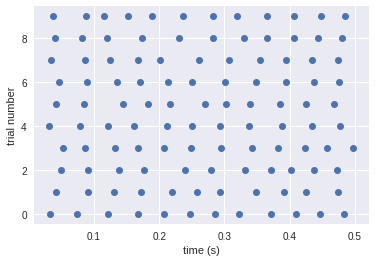

In [5]:
random.seed(0)

plt.figure()

avg_spike_rate = 0
for k in range(10):
  pre_spike_train_ex = generate_Poisson_spikes(t,rate,n_ex)
  pre_spike_train_in = generate_Poisson_spikes(t,rate,n_in)
  v,spike_times = simulate_postsynaptic_neuron(t,pre_spike_train_ex,pre_spike_train_in)
  for spk in range(len(spike_times)):
    plt.plot(spike_times[spk],k,'C0o')
  avg_spike_rate = avg_spike_rate + len(spike_times)/t_max

avg_spike_rate = avg_spike_rate/10.
print(avg_spike_rate)
plt.xlabel('time (s)')
plt.ylabel('trial number')
plt.show()


**EXPECTED OUTPUT**
```
22.6
```

![](https://github.com/ccnss/ccnss2018_students/raw/master/module1/figures/T4E2.png)

**Exercise 3:** Now increase the peak inhibitory conductance to  $\bar g_{max,ex} = 8*\bar g_{max,in}$. To maintain a similar firing rate, you should also increase the peak excitatory conductance: $\bar g_{max,ex} = 17*10^{-3}$. How are the raster plots different? Which one is more regular?

In [8]:
random.seed(0)

# insert your code here

22.2


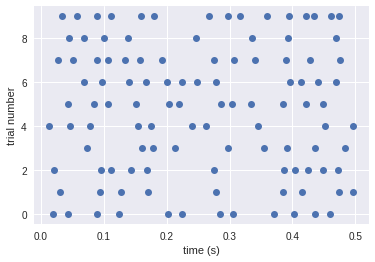

In [6]:
random.seed(0)

plt.figure()

gbar_max_ex = 17e-3
gbar_max_in = gbar_max_ex * 8

avg_spike_rate = 0
for k in range(10):
  pre_spike_train_ex = generate_Poisson_spikes(t,rate,n_ex)
  pre_spike_train_in = generate_Poisson_spikes(t,rate,n_in)
  v,spike_times = simulate_postsynaptic_neuron(t,pre_spike_train_ex,pre_spike_train_in)
  for spk in range(len(spike_times)):
    plt.plot(spike_times[spk],k,'C0o')
  avg_spike_rate = avg_spike_rate + len(spike_times)/t_max
avg_spike_rate = avg_spike_rate/10.
plt.xlabel('time (s)')
plt.ylabel('trial number')
plt.show()
print(avg_spike_rate)

**EXPECTED OUTPUT**
```
22.2
```

![](https://github.com/ccnss/ccnss2018_students/raw/master/module1/figures/T4E3.png)

**Exercise 4:** To see what's happening, simulate one example with the excitatory and inhibitory conductances from Exercise 1-2, and one example with the conductances from Exercise 3. Use exactly the same presynaptic spike train for each simulation. Plot the membrane potential for each case. How does this difference in $\bar g_{max,ex}$ and $\bar g_{max,in}$ change the subthreshold dynamics? How does this explain the difference in the postsynaptic spike trains?

In [10]:
random.seed(0)

# insert your code here

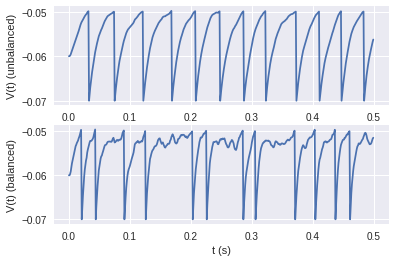

In [7]:
random.seed(0)

plt.figure()

gbar_max_ex = 6.5e-3
gbar_max_in = gbar_max_ex

pre_spike_train_ex = generate_Poisson_spikes(t,rate,n_ex)
pre_spike_train_in = generate_Poisson_spikes(t,rate,n_in)
v,spike_times = simulate_postsynaptic_neuron(t,pre_spike_train_ex,pre_spike_train_in)
plt.subplot(2,1,1); plt.plot(t,v)
plt.ylabel('V(t) (unbalanced)');

gbar_max_ex = 17e-3
gbar_max_in = gbar_max_ex * 8

v,spike_times = simulate_postsynaptic_neuron(t,pre_spike_train_ex,pre_spike_train_in)
plt.subplot(2,1,2); plt.plot(t,v)
plt.xlabel('t (s)');
plt.ylabel('V(t) (balanced)');
plt.show()

**EXPECTED OUTPUT**

![](https://github.com/ccnss/ccnss2018_students/raw/master/module1/figures/T4E4.png)

**Exercise 5:**  By increasing the inhibitory strengths relative to the excitatory strength, the postsynaptic neuron enters an irregular spiking regime in which spikes are drive by fluctuations in the input, rather than the mean input. This is called E/I balance. To quantify the irregularity of spiking, calculate the coefficient of variation (CV) of the inter-spike intervals. The CV is defined as the ratio of the standard deviation to the mean:
$$ CV = \frac{\sigma_{ISI}}{\mu_{ISI}}$$
Fill in the following function to get the CV. Test it by calculating the CV for both the balanced and unbalanced neurons (increase $t_{max}$ to 5 s). Note that for a poisson process, the CV is 1.

In [12]:
random.seed(0)


def get_CV(spike_times):
  """Calculate the coefficient of variation
  
  Arguments:
  spike_times -- list of spike times
  
  Returns:
  CV -- coefficient of variation for the spike times
  """
  # insert your code here
  return CV

# insert your code here

In [8]:
random.seed(0)

def get_CV(spike_times):
  """Calculate the coefficient of variation
  
  Arguments:
  spike_times -- list of spike times
  
  Returns:
  CV -- coefficient of variation for the spike times
  """
  ISIs = np.zeros((len(spike_times)-1))
  for k in range(len(spike_times)-1):
    ISIs[k] = spike_times[k+1]-spike_times[k]
  
  CV = np.std(ISIs)/np.mean(ISIs)
  return CV


t_max = 5; rate = 10
t = np.arange(0,t_max,dt)

pre_spike_train_ex = generate_Poisson_spikes(t,rate,n_ex)
pre_spike_train_in = generate_Poisson_spikes(t,rate,n_in)

gbar_max_ex = 17e-3
gbar_max_in = gbar_max_ex * 8

v,spike_times = simulate_postsynaptic_neuron(t,pre_spike_train_ex,pre_spike_train_in)
CV_balanced = get_CV(spike_times)

gbar_max_ex = 6.5e-3
gbar_max_in = gbar_max_ex

v,spike_times = simulate_postsynaptic_neuron(t,pre_spike_train_ex,pre_spike_train_in)
CV_unbalanced = get_CV(spike_times)

print(CV_balanced,CV_unbalanced)

0.774793911740589 0.15577586005132124


**EXPECTED OUTPUT**

```0.774793911740589 0.15577586005132124```

**Exercise 6:** Now repeat the previous exercise while ranging the presynaptic range from 10 to 40 Hz. Plot the CV against the firing rate for both the balanced and unbalanced neurons. Why does the CV decrease with firing rate?

In [14]:
random.seed(0)

# insert your text here

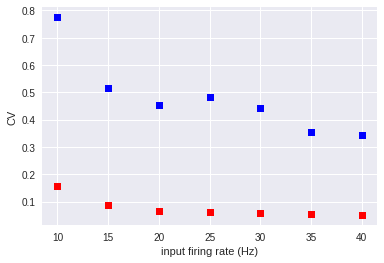

In [10]:
random.seed(0)

plt.figure()
for rate in np.arange(10,45,5):
    CV_balanced_mean = 0
    CV_unbalanced_mean = 0
    
    pre_spike_train_ex = generate_Poisson_spikes(t,rate,n_ex)
    pre_spike_train_in = generate_Poisson_spikes(t,rate,n_in)

    gbar_max_ex = 17e-3
    gbar_max_in = gbar_max_ex * 8

    v,spike_times = simulate_postsynaptic_neuron(t,pre_spike_train_ex,pre_spike_train_in)
    CV_balanced = get_CV(spike_times)

    plt.plot(rate,CV_balanced,'sb')
    
    gbar_max_ex = 6.5e-3
    gbar_max_in = gbar_max_ex

    v,spike_times = simulate_postsynaptic_neuron(t,pre_spike_train_ex,pre_spike_train_in)
    CV_unbalanced = get_CV(spike_times)

    plt.plot(rate,CV_unbalanced,'sr')

plt.xlabel('input firing rate (Hz)')
plt.ylabel('CV')
plt.show()


**EXPECTED OUTPUT**

![](https://github.com/ccnss/ccnss2018_students/raw/master/module1/figures/T4E6.png)

**Exercise 7:** Next we will see how STDP can help E/I balance in a postsynaptic neuron. First, execute the cell below to set the STDP parameters used in Tutorial 2.

In [11]:
tau_stdp = 20e-3       # second
A_plus = 5e-3  
A_minus = A_plus*1.10

gbar_max_ex = 0.015
gbar_max_in = 0.015

Then, fill in the functions below to simulate STDP. You can use your code from Tutorial 2, while adding nonplastic inhibitory synaptic inputs. Also fill in the function to simulate a postsynaptic neuron with frozen weights (i.e., with fixed $\bar g_i$). Check that your code works by simulating a plastic postystnaptic neurons receiving input from 300 excitatory cells and 75 inhibitory cells (all firing at 20 Hz) for 5 seconds and plotting the average $\bar g_i(t)$. Then simulate the postsynaptic neuron for 100 ms after freezing the synaptic weights to those at the end of the STDP protocol. Plot the membraine potential. 


In [17]:
random.seed(0)

def generate_P(t,pre_spike_train):
  """ Generate P to track presynaptic spikes
  
  Arguments:
  t -- time
  pre_spike_train -- presynaptic spike train matrix, same length as t
  
  Returns:
  P -- matrix, ith row is P for the ith presynaptic input 
  """
  # insert your code here
  return P

def simulate_postsynaptic_neuron_plastic(t,pre_spike_train_ex,pre_spike_train_in):
    """Simulate a plastic neuron
    
    Arguments:
    t -- time
    pre_spike_train_ex -- excitatory presynaptic spike train matrix, same length as t
    pre_spike_train_in -- inhibitory presynaptic spike train matrix, same length as t
  
    Returns:
    gbar -- matrix, ith row is peak excitatory conductance 
            over time for ith presynaptic neuron
    v -- membrane potential
    spike_times -- list of spike times 
    """
    # insert your code here
    return gbar,v


def simulate_postsynaptic_neuron_frozen(t,pre_spike_train_ex,pre_spike_train_in,gbar):
    """Simulate the postsynaptic neuron after freezing the weights
    
    Arguments:
    t -- time
    pre_spike_train_ex -- excitatory presynaptic spike train matrix, same length as t
    pre_spike_train_in -- inhibitory presynaptic spike train matrix, same length as t
    gbar -- vector, ith element is peak excitatory conductance 
            over time for ith presynaptic neuron
            
    Returns:
    v -- membrane potential
    spike_times -- list of spike times 
    """
    # insert your code here
    return v,spike_times
  
# insert your code here

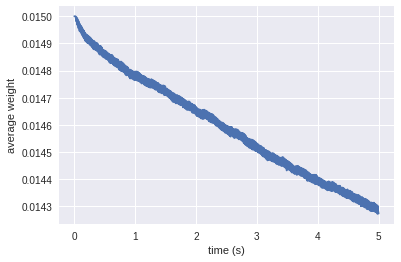

Text(0,0.5,'V(t)')

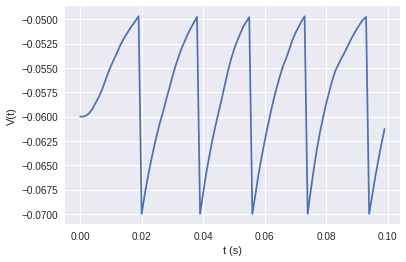

In [13]:
random.seed(0)

tau_stdp = 20e-3       # second
A_plus = 5e-3  
A_minus = A_plus*1.10

gbar_max_ex = 0.015
gbar_max_in = 0.015

random.seed(0)

def generate_P(t,pre_spike_train):
  """ Generate P to track presynaptic spikes
  
  Arguments:
  t -- time
  pre_spike_train -- presynaptic spike train matrix, same length as t
  
  Returns:
  P -- matrix, ith row is P for the ith presynaptic input 
  """
  n = pre_spike_train.shape[0]
  P = np.zeros((n,len(t)))
  for k in range(n):
    for j in range(len(t)-1):
      P[k,j+1] = P[k,j] - dt/tau_stdp * P[k,j]
      if pre_spike_train[k,j] == 1:
         P[k,j+1] = P[k,j] + A_plus;
  return P


def simulate_postsynaptic_neuron_plastic(t,pre_spike_train_ex,pre_spike_train_in):
    """Simulate a plastic neuron
    
    Arguments:
    t -- time
    pre_spike_train_ex -- excitatory presynaptic spike train matrix, same length as t
    pre_spike_train_in -- inhibitory presynaptic spike train matrix, same length as t
  
    Returns:
    gbar -- matrix, ith row is peak excitatory conductance 
            over time for ith presynaptic neuron
    v -- membrane potential
    spike_times -- list of spike times 
    """
    n_ex = pre_spike_train_ex.shape[0]
    n_in = pre_spike_train_in.shape[0]
    spike_times = []
    P = generate_P(t,pre_spike_train_ex)
    # Simulate
    spike_times = []
    v = np.zeros(len(t))
    M = np.zeros(len(t))
    g_ex = np.zeros(len(t))
    g_in = np.zeros(len(t))
    gbar = np.zeros((n_ex,len(t)))
    gbar[:,0] = gbar_max_ex
    v[0] = el
    for j in range(len(t)-1):
        v[j+1] = v[j] + dt / tau * (el - v[j] + g_ex[j]*(e_ex-v[j])+ g_in[j]*(e_in-v[j]))
        M[j+1] = M[j] - dt / tau_stdp * M[j]
        g_ex[j+1] = g_ex[j] - dt / tau_syn * g_ex[j]
        g_in[j+1] = g_in[j] - dt / tau_syn * g_in[j]
        gbar[:,j+1] = gbar[:,j]
        for k in range(n_ex):
          if pre_spike_train_ex[k,j] == 1:
            g_ex[j+1] = g_ex[j+1]+gbar[k,j]
            gbar[k,j+1] = gbar[k,j] + M[j]*gbar_max_ex
            if gbar[k,j+1] < 0:
              gbar[k,j+1] = 0
        for k in range(n_in):
          if pre_spike_train_in[k,j] == 1:
            g_in[j+1] = g_in[j+1]+gbar_max_in
        if v[j] >= vth:
            v[j+1] = vr
            spike_times.append(t[j])
            M[j+1] = M[j] - A_minus
            gbar[:,j+1] = gbar[:,j] + P[:,j]*gbar_max_ex
            for k in range(n_ex):
              if gbar[k,j+1]>gbar_max_ex:
                gbar[k,j+1] = gbar_max_ex
    return gbar,v


def simulate_postsynaptic_neuron_frozen(t,pre_spike_train_ex,pre_spike_train_in,gbar):
    """Simulate the postsynaptic neuron after freezing the weights
    
    Arguments:
    t -- time
    pre_spike_train_ex -- excitatory presynaptic spike train matrix, same length as t
    pre_spike_train_in -- inhibitory presynaptic spike train matrix, same length as t
    gbar -- vector, ith element is peak excitatory conductance 
            over time for ith presynaptic neuron
            
    Returns:
    v -- membrane potential
    spike_times -- list of spike times 
    """
    n_ex = pre_spike_train_ex.shape[0]
    n_in = pre_spike_train_in.shape[0]
    spike_times = []
    v = np.zeros(len(t))
    g_ex = np.zeros(len(t))
    g_in = np.zeros(len(t))
    v[0] = el
    for j in range(len(t)-1):
        v[j+1] = v[j] + dt / tau * (el - v[j] + g_ex[j]*(e_ex-v[j])+ g_in[j]*(e_in-v[j]))
        g_ex[j+1] = g_ex[j] - dt / tau_syn * g_ex[j]
        g_in[j+1] = g_in[j] - dt / tau_syn * g_in[j]
        for k in range(n_ex):
          if pre_spike_train_ex[k,j] == 1:
            g_ex[j+1] = g_ex[j+1]+gbar[k]
        for k in range(n_in):
          if pre_spike_train_in[k,j] == 1:
            g_in[j+1] = g_in[j+1]+gbar_max_in
        if v[j] >= vth:
            v[j+1] = vr
            spike_times.append(t[j])
    return v,spike_times
  
  
t_max = 5;
t = np.arange(0,t_max,dt)

n_ex = 300; n_in = 75; rate = 20

pre_spike_train_ex = generate_Poisson_spikes(t,rate,n_ex)
pre_spike_train_in = generate_Poisson_spikes(t,rate,n_in)

gbar,v = simulate_postsynaptic_neuron_plastic(t,pre_spike_train_ex,pre_spike_train_in)

plt.figure()
plt.plot(t,np.mean(gbar,axis=0))
plt.xlabel('time (s)')
plt.ylabel('average weight')
plt.show()

t_max = 100e-3;
t = np.arange(0,t_max,dt)

v,spike_times = simulate_postsynaptic_neuron_frozen(t,pre_spike_train_ex,pre_spike_train_in,gbar[:,-1])

plt.figure()
plt.plot(t,v)
plt.xlabel('t (s)')
plt.ylabel('V(t)')

**EXPECTED OUTPUT**

![](https://github.com/ccnss/ccnss2018_students/raw/master/module1/figures/T4E7a.png)
![](https://github.com/ccnss/ccnss2018_students/raw/master/module1/figures/T4E7b.png)


**Exercise 8:** Now increase $t_{max}$ to 1000 s and simulate STDP by executing the following cell (warning: this is really slow and might kill all your memory). 

In [16]:
random.seed(0)
  
t_max = 1000;
t = np.arange(0,t_max,dt)

n_ex = 300; n_in = 75; rate = 20

pre_spike_train_ex = generate_Poisson_spikes(t,rate,n_ex)
pre_spike_train_in = generate_Poisson_spikes(t,rate,n_in)

gbar, v = simulate_postsynaptic_neuron_plastic(t,pre_spike_train_ex,pre_spike_train_in)


When it has completed, plot the histograms at the end of learning and 90% of the way through. Has the system converged?

In [19]:
random.seed(0)

# insert your code here

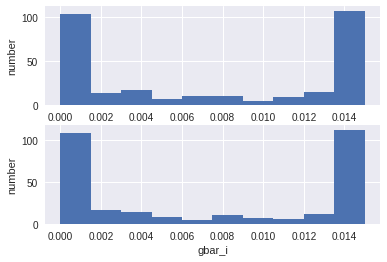

In [17]:

plt.figure()
plt.subplot(2,1,1); plt.hist(gbar[:,np.where(t>t_max*0.9)[0][0]])
plt.ylabel('number')
plt.subplot(2,1,2); plt.hist(gbar[:,-1])
plt.xlabel('gbar_i')
plt.ylabel('number')
plt.show()

**EXPECTED OUTPUT**

![](https://github.com/ccnss/ccnss2018_students/raw/master/module1/figures/T4E8.png)

**Exercise 9:** Finally, use the weights at the end of STDP (from Exercise 8) to simulate the postsynaptic neuron for  $t_{max}=15 s$(use  the function ``simulate_postsynaptic_neuron_frozen``).
calculate the CV at the beginning and at the end of STDP (calculate the CV over a period of ). 

In [21]:
random.seed(0)

# insert your code here

In [18]:
random.seed(0)

t_max=15
t = np.arange(0, t_max, dt)

pre_spike_train_ex = generate_Poisson_spikes(t,rate,n_ex)
pre_spike_train_in = generate_Poisson_spikes(t,rate,n_in)

v,spike_times = simulate_postsynaptic_neuron_frozen(t,pre_spike_train_ex,pre_spike_train_in,gbar[:,0])
CV_before = get_CV(spike_times)

v,spike_times = simulate_postsynaptic_neuron_frozen(t,pre_spike_train_ex,pre_spike_train_in,gbar[:,-1])
CV_after = get_CV(spike_times)

print(CV_before,CV_after)

0.10194746220181417 0.7006726102447001


**EXPECTED OUTPUT**

```0.10194746220181417 0.7006726102447001```